In [148]:
import torch
import torch.nn.functional as F
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

In [196]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.49139969, 0.48215842, 0.44653093], [0.20220212, 0.19931542, 0.20086347])
])
training_data = CIFAR10('cifar/train', train=True, download=True, transform=transform)
loader = DataLoader(training_data, 32, True)

Files already downloaded and verified


In [129]:
#calculate dataset mean and std per channel to feed to transform normalization params
def calc_normalize_values():
    means = np.zeros(3)
    stds = np.zeros(3)
    N = len(training_data)
    for i, (data, label) in enumerate(training_data):
        means += data.numpy().mean(axis=(1,2))
        stds += data.numpy().std(axis=(1,2))
    means /= N
    stds /= N
    print(means, stds)
calc_normalize_values()

[ 7.98745686e-08 -2.55480409e-08 -8.12412007e-08] [0.99999996 1.00000004 1.        ]


In [138]:
(data, labels) = next(iter(loader))
print(data.shape)

torch.Size([32, 3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.30045834


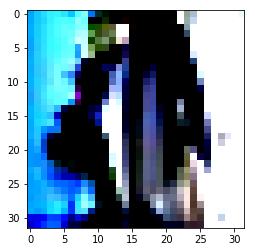

In [144]:
im = data[5].numpy()
plt.imshow(im.T)

In [140]:
target[5].numpy()

array(5)

In [197]:
p={}
p['W1'] = torch.randn(32, 3, 5, 5, requires_grad=True)
p['b1'] = torch.zeros(32, requires_grad=True)
p['W2'] = torch.randn(16, 32, 5, 5, requires_grad=True)
p['b2'] = torch.zeros(16, requires_grad=True)
p['W3'] = torch.randn(16*32*32, 10, requires_grad=True)
p['b3'] = torch.zeros(10, requires_grad=True)

In [198]:
def convnet(x, params):
    a1 = F.conv2d(x, weight=params['W1'], bias=params['b1'], padding=2)
    z1 = a1.clamp(0)
    a2 = F.conv2d(z1, weight=params['W2'], bias=params['b2'], padding=2)
    z2 = a2.clamp(0)
    z2 = z2.view(z2.shape[0], -1)
    a3 = z2.mm(params['W3']) + params['b3']
    return a3

scores = convnet(data, p)
loss = torch.nn.CrossEntropyLoss()
cost = loss(scores, labels)
cost.backward()

In [208]:
for idx, (data, labels) in enumerate(loader):
    scores = convnet(data, p)
    loss = torch.nn.CrossEntropyLoss()
    cost = loss(scores, labels)
    cost.backward()
    with torch.no_grad():
        for k,w in p.items():
            w -= 1e-3 * w.grad
            w.grad.zero_()
    if idx % 20 == 0:
        print(cost)

tensor(40474.3672, grad_fn=<NllLossBackward>)
tensor(264.0937, grad_fn=<NllLossBackward>)
tensor(87.0619, grad_fn=<NllLossBackward>)
tensor(42.8955, grad_fn=<NllLossBackward>)
tensor(40.6730, grad_fn=<NllLossBackward>)
tensor(32.9454, grad_fn=<NllLossBackward>)
tensor(28.4147, grad_fn=<NllLossBackward>)
tensor(17.8030, grad_fn=<NllLossBackward>)
tensor(13.6624, grad_fn=<NllLossBackward>)
tensor(28.2372, grad_fn=<NllLossBackward>)
tensor(18.9815, grad_fn=<NllLossBackward>)
tensor(6.6298, grad_fn=<NllLossBackward>)
tensor(21.0830, grad_fn=<NllLossBackward>)
tensor(9.3306, grad_fn=<NllLossBackward>)
tensor(5.0810, grad_fn=<NllLossBackward>)
tensor(10.5993, grad_fn=<NllLossBackward>)
tensor(6.1931, grad_fn=<NllLossBackward>)
tensor(9.4664, grad_fn=<NllLossBackward>)
tensor(4.2337, grad_fn=<NllLossBackward>)
tensor(6.7559, grad_fn=<NllLossBackward>)
tensor(7.7474, grad_fn=<NllLossBackward>)
tensor(6.8701, grad_fn=<NllLossBackward>)
tensor(8.2147, grad_fn=<NllLossBackward>)
tensor(8.5006, gr

KeyboardInterrupt: 

In [205]:
d={1:2,3:4}
for (k,v) in d.items():
    print(v)

2
4
